In [1]:
import numpy as np
import pandas as pd
import _pickle as cPickle
from deap import base, creator, tools, algorithms
from sklearn.preprocessing import LabelEncoder
from sklearn.datasets import load_iris

In [2]:
iris=load_iris()

In [3]:
df=pd.DataFrame(data=iris.data, columns=iris.feature_names)

In [4]:
df['species']=iris.target

In [5]:
df_binary=df[df['species']!=2]
df_binary=df_binary.drop(['sepal length (cm)', 'sepal width (cm)'], axis=1)

In [6]:
df_binary

,petal length (cm),petal width (cm),species
0,1.4,0.2,0
1,1.4,0.2,0
2,1.3,0.2,0
3,1.5,0.2,0
4,1.4,0.2,0
...,...,...,...
95,4.2,1.2,1
96,4.2,1.3,1
97,4.3,1.3,1
98,3.0,1.1,1


In [7]:
y = df_binary['species'].values
X = df_binary.iloc[:, [0,1]].values

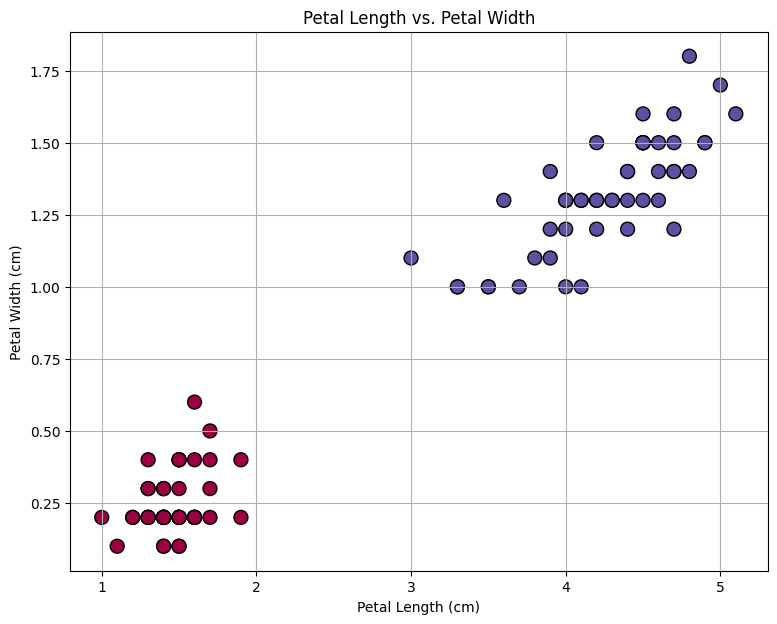

In [8]:
import matplotlib.pyplot as plt

# Plotting petal length vs. petal width
plt.figure(figsize=(9, 7))
plt.scatter(df_binary['petal length (cm)'], df_binary['petal width (cm)'], c=y, cmap='Spectral', s=100, edgecolor='k')
plt.title('Petal Length vs. Petal Width')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.grid()
plt.show()

In [9]:
from sklearn.model_selection import cross_val_predict, cross_validate
from sklearn.neural_network import MLPClassifier as MLP
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.metrics import make_scorer

In [10]:
max = [0,0]
for i in range(5):
    
    classificador=MLP(hidden_layer_sizes=(22,), max_iter=10000, activation="tanh", 
                          learning_rate_init=0.1, tol = 1e-5, random_state=i)
    result = cross_validate(classificador, X, y, cv = KFold(n_splits=10, shuffle=True, random_state=i), 
    scoring = {"accuracy": make_scorer(accuracy_score)} , return_estimator = True)
    
    #Calculando a acurácia do teste
    accuracy =  np.mean(result['test_accuracy'])
    print("Accurácia: ",  accuracy)

    if (max[0] < accuracy):
        max[0] = accuracy
        max[1] = i
        bb = classificador
print(f"Melhor resultado: \n Acurácia: {max[0]}\n Seed: {max[1]}")

Accurácia:  1.0
Accurácia:  1.0
Accurácia:  1.0
Accurácia:  1.0
Accurácia:  1.0
Melhor resultado: 
 Acurácia: 1.0
 Seed: 0


In [11]:
bb.fit(X, y)
Predições=bb.predict(X)
print("Predictions:", Predições)
print("Labels:", y)

Predictions: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Labels: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


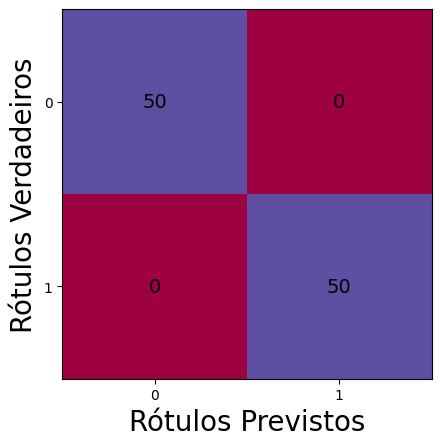

In [12]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

unique_labels = np.unique(y)
Predição = cross_val_predict(bb, X, y, cv = KFold(n_splits=10, shuffle=True, random_state=0))
conf_matrix = confusion_matrix(y, Predição, labels=unique_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=unique_labels)
disp.plot(cmap="Spectral", colorbar=False, values_format='d')
for text in disp.im_.axes.texts:
    text.set_color('black')
    text.set_fontsize(14)
plt.xlabel('Rótulos Previstos', fontsize=20)
plt.ylabel('Rótulos Verdadeiros', fontsize=20)
plt.show()

In [13]:
y = df_binary['species'].values
X = df_binary.iloc[:, [0,1]].values
bb.fit(X, y)
Predições=bb.predict(X)

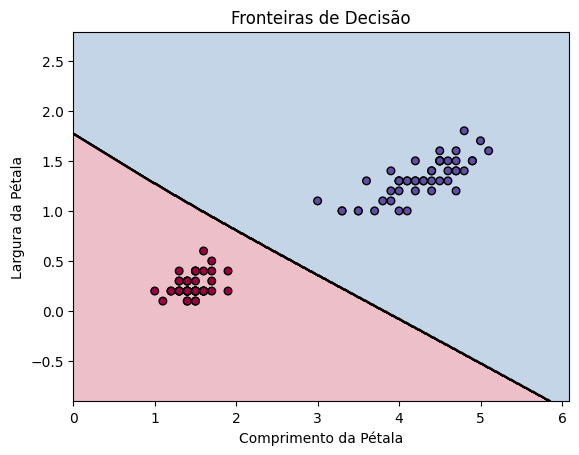

In [14]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

#Definindo a escala dos gráficos com base nos valores máximos e mínimos das características da pétala 
#LARGURA (eixo Y)
#COMPRIMENTO (eixo X)

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

#A função np.meshgrid cria uma grade de pontos em um espaço bidimensional 
#O np.arange gera os valores no intervalo definido por xmax, xmin, ymax, ymin com o passo de 0.01
#xx e yy são matrizes que contem as coordenadas x e y de cada ponto da grade

Z = bb.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

#np.c_[xx.ravel(), yy.ravel()] combina as matrizes xx e yy numa matriz e coordenadas
#O classificador black box faz então previsões sobre estas coordenadas
#A variável Z contem as classes previstas para cadaa um dos pontos da grade
#Por fim, reorganizamos Z para que ele tenha a mesma forma que xx

# Plotar as fronteiras de decisão e os pontos de dados
plt.contourf(xx, yy, Z, alpha=0.3, cmap="Spectral")
contour = plt.contour(xx, yy, Z, colors='black', linewidths=1, linestyles='solid') 
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap="Spectral", edgecolor='k')
plt.xlabel('Comprimento da Pétala')
plt.ylabel('Largura da Pétala')
plt.title('Fronteiras de Decisão')
plt.show()

## Algoritmo Genético (Promissor)

In [15]:
import deap
from deap import base, creator, tools, algorithms
import random
import pandas as pd
import numpy as np
from deap import base, creator, tools, algorithms

In [16]:
# Converter as linhas do DataFrame (excluindo a classe) em listas de características
individuos_iniciais = df[['petal length (cm)', 'petal width (cm)']].values.tolist()
classes_iniciais = df['species'].tolist()

# Criar a classe de aptidão e o indivíduo
creator.create("FitnessMax", base.Fitness, weights=(1.0,))  # Maximização
creator.create("Individual", list, fitness=creator.FitnessMax)

In [17]:
# # Função de distância (temporária)
# def distance_function(x0d, x1d, discrete, continuous, class_name):
#     # Função de exemplo para calcular distância
#     return np.linalg.norm(np.array(list(x0d.values())) - np.array(list(x1d.values())))

In [18]:
continuous = ['petal length (cm)', 'petal width (cm)']
discrete=[]
class_name = 'species'
idx_features = ['petal length (cm)', 'petal width (cm)']

min_vals = df_binary[continuous].min().values
max_vals = df_binary[continuous].max().values
print(min_vals, max_vals)

[1.  0.1] [5.1 1.8]


In [19]:
def distance_function(x0d, x1d, discrete, continuous, class_name, min_vals, max_vals):
    # Converte dicionários em arrays
    u = np.array(list(x0d.values()))
    v = np.array(list(x1d.values()))

    # Normaliza os vetores (evita divisão por zero)
    denom = max_vals - min_vals
    denom[denom == 0] = 1  # Garante que não haja divisão por zero
    u_norm = (u - min_vals) / denom
    v_norm = (v - min_vals) / denom

    # Calcula o numerador (distância quadrada entre vetores normalizados)
    numerator = np.sum((u_norm - v_norm) ** 2)

    # Calcula o denominador (norma quadrada normalizada)
    denominator = np.sum(u_norm ** 2) + np.sum(v_norm ** 2)

    return numerator / denominator if denominator != 0 else 0.0

In [20]:
# x_referência=individuos_iniciais[5]
# x_teste=individuos_iniciais[2] 

# x0d = {idx_features[i]: val for i, val in enumerate(x_referência)}
# x1d = {idx_features[i]: val for i, val in enumerate(x_teste)}

# print(x1d, x0d)

In [21]:
# dist = distance_function(x0d, x1d, discrete, continuous, class_name, min_vals, max_vals)
# print(dist)

In [22]:
idx=60
def create_individual():
    return individuos_iniciais[idx] + [classes_iniciais[idx]]  

In [23]:
# Função de fitness 
def fitness_sso(x0, bb, alpha1, alpha2, eta, discrete, continuous, class_name, idx_features, distance_function, x1):
    # similar_same_outcome
    x0d = {idx_features[i]: val for i, val in enumerate(x0)}
    x1d = {idx_features[i]: val for i, val in enumerate(x1)}
    
    # zero if is too similar
    sim_ratio = 1.0 - distance_function(x0d, x1d, discrete, continuous, class_name, min_vals, max_vals)
    record_similarity = 0.0 if sim_ratio >= eta else sim_ratio
    
    y0 = bb.predict(np.asarray(x0).reshape(1, -1))[0]
    y1 = bb.predict(np.asarray(x1).reshape(1, -1))[0]
    target_similarity = 1.0 if y0 == y1 else 0.0
    
    evaluation = float(alpha1) * float(record_similarity) + float(alpha2) * float(target_similarity)
    return evaluation,
   
def fitness_sdo(x0, bb, alpha1, alpha2, eta, discrete, continuous, class_name, idx_features, distance_function, x1):
    # similar_different_outcome
    x0d = {idx_features[i]: val for i, val in enumerate(x0)}
    x1d = {idx_features[i]: val for i, val in enumerate(x1)}

    # zero if is too similar
    sim_ratio = 1.0 - distance_function(x0d, x1d, discrete, continuous, class_name, min_vals, max_vals)
    record_similarity = 0.0 if sim_ratio >= eta else sim_ratio

    y0 = bb.predict(np.asarray(x0).reshape(1, -1))[0]
    y1 = bb.predict(np.asarray(x1).reshape(1, -1))[0]
    target_similarity = 1.0 if y0 != y1 else 0.0  

    evaluation = float(alpha1) * float(record_similarity) + float(alpha2) * target_similarity
    return evaluation,

In [24]:
#Reprodução
def cxBlendWithClass(ind1, ind2, alpha=0.5):
   
    for i, (x1, x2) in enumerate(zip(ind1[:-1], ind2[:-1])):  # Ignorar a última coluna (classe)
        gamma = (1. + 2. * alpha) * random.random() - alpha
        ind1[i] = (1. - gamma) * x1 + gamma * x2
        ind2[i] = gamma * x1 + (1. - gamma) * x2
    
    # Manter a classe original dos indivíduos sem alterar
    ind1[-1] = ind1[-1]  # A classe de ind1 permanece inalterada
    ind2[-1] = ind2[-1]  # A classe de ind2 permanece inalterada
    
    return ind1, ind2

#Mutação
def mutGaussianWithClass(individual, mu, sigma, indpb):
    # Aplica mutação apenas às características numéricas, ignorando a última posição (classe)
    for i in range(len(individual) - 1):  # Ignorar a última coluna (classe)
        if random.random() < indpb:
            individual[i] += random.gauss(mu, sigma)  # Aplica a mutação nas características numéricas
    
    return individual,  # Retorne um único indivíduo como tupla

In [51]:
#Criando indivíduos que estão próximos e resultam numa mesma classe
individuo_inicial = individuos_iniciais[idx] 
xi=individuo_inicial
def evaluate(individual):
    # Parâmetros da função de fitness (exemplo)
    alpha1 = 0.7
    alpha2 = 0.5
    eta = 0.3
    discrete = []
    continuous = ['petal length (cm)', 'petal width (cm)']
    class_name = 'species'
    idx_features = ['petal length (cm)', 'petal width (cm)']
    # Avaliar usando a função de fitness fornecida
    return fitness_sso(individual[:2], bb, alpha1, alpha2, eta, discrete, continuous, class_name, idx_features, distance_function, xi)

# Configuração da toolbox
toolbox = base.Toolbox()
toolbox.register("individual", tools.initIterate, creator.Individual, create_individual)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)
toolbox.register("mate", cxBlendWithClass, alpha=0.5)
toolbox.register("mutate", mutGaussianWithClass, mu=1, sigma=1, indpb=0.2)
toolbox.register("select", tools.selTournament, tournsize=3)
toolbox.register("evaluate", evaluate)  # Passar o indivíduo inicial aqui

# Criar a população inicial

population = toolbox.population(n=500)
# for i, ind in enumerate(population):
#     print(f"Indivíduo {i+1}: {ind}")

# Parâmetros do algoritmo
ngen = 10  # Número de gerações
cxpb, mutpb = 0.5, 0.2  # Probabilidades de cruzamento e mutação

# Executa o algoritmo genético
result, log = algorithms.eaSimple(population, toolbox, cxpb, mutpb, ngen, verbose=False)

# Exibir o melhor resultado
best_individual = tools.selBest(population, 1)[0]
print(f"Melhor indivíduo: {best_individual}, Fitness: {best_individual.fitness.values}")

# Filtrar e armazenar os novos indivíduos gerados
novos_individuos_semelhantes = [ind[:2] for ind in population]  # Pegando apenas as características

print(f"Novos indivíduos gerados: {novos_individuos_semelhantes}")

Melhor indivíduo: [3.8778408365393746, 2.5171201345194056, 1], Fitness: (0.5,)
Novos indivíduos gerados: [[3.8778408365393746, 2.5171201345194056], [4.065889312867332, 1.0], [4.420561978138203, 3.505166139901704], [3.115327416120049, 2.2404685109702522], [3.2086057226212334, 1.7509505700985575], [3.2258195287706783, 2.5492752281627955], [3.4999999999999996, 1.9633172644442403], [3.5031788741695014, 1.0], [4.405735878288187, 2.426799621571327], [5.135514237262569, 0.98648751379294], [4.210131901806092, 0.8550799254236314], [3.5152280052803153, 0.9999340740101427], [4.231006090557925, 2.601938573681603], [3.62365266872499, 2.0318163646402754], [3.603612509424573, 1.5933816643820375], [3.6019192316921025, 0.9391669910809187], [3.4897269943965386, 1.030222886812165], [3.619704351742897, 1.0499737759526793], [3.6205844024111262, 1.6995741826865258], [3.518859106022277, 2.2949856587265165], [3.877131729396722, 1.1584014404206824], [3.8015731271898248, 1.0008423979386245], [4.472347018290954,

In [52]:
#Criando indivíduos que estão próximos mas resultam em um classe diferente
individuo_inicial = individuos_iniciais[idx] 
xi=individuo_inicial

def evaluate(individual):
    # Parâmetros da função de fitness (exemplo)
    alpha1 = 0.7
    alpha2 = 0.5
    eta = 0.3
    discrete = []
    continuous = ['petal length (cm)', 'petal width (cm)']
    class_name = 'species'
    idx_features = ['petal length (cm)', 'petal width (cm)']
    # Avaliar usando a função de fitness fornecida
    return fitness_sdo(individual[:2], bb, alpha1, alpha2, eta, discrete, continuous, class_name, idx_features, distance_function, xi)

# Configuração da toolbox
toolbox = base.Toolbox()
toolbox.register("individual", tools.initIterate, creator.Individual, create_individual)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)
toolbox.register("mate", cxBlendWithClass, alpha=0.5)
toolbox.register("mutate", mutGaussianWithClass, mu=1, sigma=1, indpb=0.2)
toolbox.register("select", tools.selTournament, tournsize=3)
toolbox.register("evaluate", evaluate)  # Passar o indivíduo inicial aqui

# Criar a população inicial
population = toolbox.population(n=500)

# Parâmetros do algoritmo
ngen = 10 # Número de gerações
cxpb, mutpb = 0.5, 0.2  # Probabilidades de cruzamento e mutação

# Executa o algoritmo genético
result, log = algorithms.eaSimple(population, toolbox, cxpb, mutpb, ngen, verbose=False)

# Exibir o melhor resultado
best_individual = tools.selBest(population, 1)[0]
print(f"Melhor indivíduo: {best_individual}, Fitness: {best_individual.fitness.values}")

# Filtrar e armazenar os novos indivíduos gerados
novos_individuos_diferentes= [ind[:2] for ind in population]  # Pegando apenas as características

print(f"Novos indivíduos gerados: {novos_individuos_diferentes}")

Melhor indivíduo: [3.8711765495607313, -0.6321252518350705, 1], Fitness: (0.7098040541609679,)
Novos indivíduos gerados: [[5.8132895196607635, -1.0575038668736763], [2.911831509174135, -0.7414181220992526], [3.435657435919987, -0.36868285837927606], [6.269450403838151, -1.2891789911938623], [5.0402899348489605, -0.6882676950462647], [3.293868147326388, -0.8309666719387534], [4.419315864598199, -0.5023932257041845], [4.226780967756955, -1.0953723146432786], [4.021971059279485, -0.7497284389055376], [3.5, -0.5552752486516342], [3.5, -0.5552752486516342], [3.5, -0.5425567243212654], [3.5, -0.555679134240608], [3.236387512037648, -0.5656179835381169], [3.0666426210716513, -0.50166387777226], [3.4043520424802654, -0.5395042905278294], [4.212733581993299, -0.9730092692777724], [3.7547244692561303, -0.5227147643179559], [3.5003093968907404, 0.6133138523514314], [3.4989369980127214, -0.6101797845144032], [5.19113788036633, -0.4639554093707566], [2.1688102905640845, -0.8935711297107064], [4.671

In [53]:
SSO=pd.DataFrame(novos_individuos_semelhantes)
SDO=pd.DataFrame(novos_individuos_diferentes)
print(SSO.head())
print(SDO.head())

          0         1
0  3.877841  2.517120
1  4.065889  1.000000
2  4.420562  3.505166
3  3.115327  2.240469
4  3.208606  1.750951
          0         1
0  5.813290 -1.057504
1  2.911832 -0.741418
2  3.435657 -0.368683
3  6.269450 -1.289179
4  5.040290 -0.688268


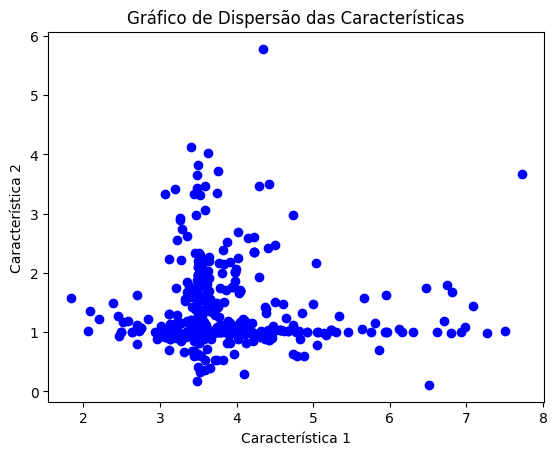

In [54]:
import matplotlib.pyplot as plt

plt.scatter(SSO[0], SSO[1], c='b')
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.title('Gráfico de Dispersão das Características')
plt.show()

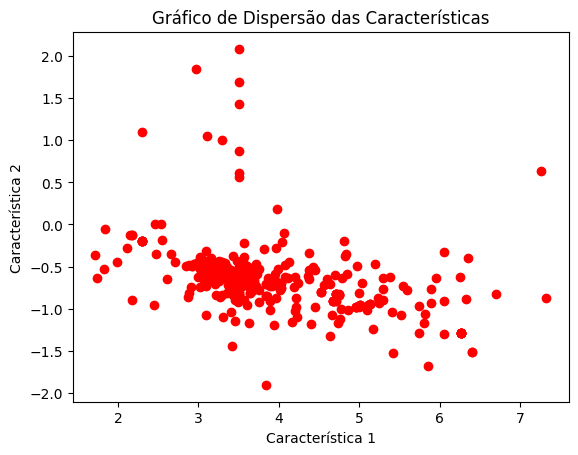

In [55]:
import matplotlib.pyplot as plt

plt.scatter(SDO[0], SDO[1], c='r')
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.title('Gráfico de Dispersão das Características')
plt.show()

In [56]:
print(xi)

[3.5, 1.0]


In [57]:
XSSO=SSO.iloc[:,[0,1]].values
XSDO=SDO.iloc[:,[0,1]].values
#print(XSSO)
#print(XSDO)

In [58]:
XTOTAL = np.vstack((XSSO, XSDO))
#print(XTOTAL)

In [59]:
ytotal= bb.predict(XTOTAL)
ytotal

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [60]:
from sklearn.tree import DecisionTreeClassifier
ClassificadorDT = DecisionTreeClassifier(max_depth=15, random_state=42)
ClassificadorDT.fit(XTOTAL, ytotal)

DecisionTreeClassifier(max_depth=15, random_state=42)

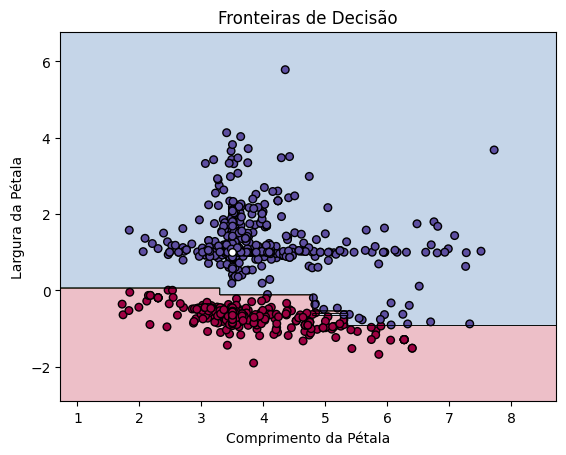

In [61]:
x_min, x_max = XTOTAL[:, 0].min() - 1, XTOTAL[:, 0].max() + 1
y_min, y_max = XTOTAL[:, 1].min() - 1, XTOTAL[:, 1].max() + 1

#Definindo a escala dos gráficos com base nos valores máximos e mínimos das características da pétala 
#LARGURA (eixo Y)
#COMPRIMENTO (eixo X)

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

#A função np.meshgrid cria uma grade de pontos em um espaço bidimensional 
#O np.arange gera os valores no intervalo definido por xmax, xmin, ymax, ymin com o passo de 0.01
#xx e yy são matrizes que contem as coordenadas x e y de cada ponto da grade

Z = ClassificadorDT.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

#np.c_[xx.ravel(), yy.ravel()] combina as matrizes xx e yy numa matriz e coordenadas
#O classificador black box faz então previsões sobre estas coordenadas
#A variável Z contem as classes previstas para cadaa um dos pontos da grade
#Por fim, reorganizamos Z para que ele tenha a mesma forma que xx

# Plotar as fronteiras de decisão e os pontos de dados
plt.contourf(xx, yy, Z, alpha=0.3, cmap="Spectral")
contour = plt.contour(xx, yy, Z, colors='black', linewidths=0.2, linestyles='solid') 
plt.scatter(XTOTAL[:, 0], XTOTAL[:, 1], c=ytotal, s=30, cmap="Spectral", edgecolor='k')
plt.scatter(xi[0], xi[1], color='w', s=30, label='Ponto Destacado', edgecolor='black')  # Destacando o ponto
plt.xlabel('Comprimento da Pétala')
plt.ylabel('Largura da Pétala')
plt.title('Fronteiras de Decisão')
plt.show()

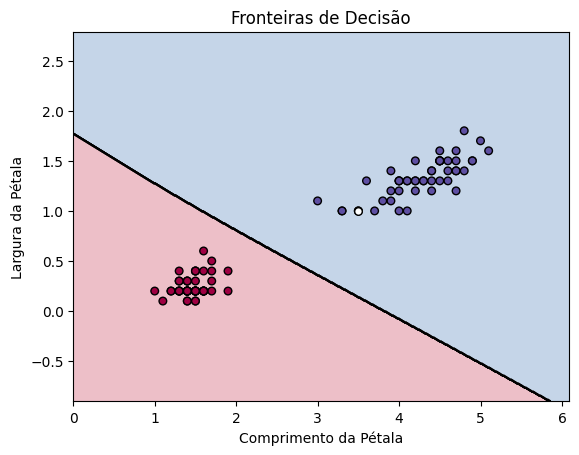

In [62]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

#Definindo a escala dos gráficos com base nos valores máximos e mínimos das características da pétala 
#LARGURA (eixo Y)
#COMPRIMENTO (eixo X)

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

#A função np.meshgrid cria uma grade de pontos em um espaço bidimensional 
#O np.arange gera os valores no intervalo definido por xmax, xmin, ymax, ymin com o passo de 0.01
#xx e yy são matrizes que contem as coordenadas x e y de cada ponto da grade

Z = bb.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

#np.c_[xx.ravel(), yy.ravel()] combina as matrizes xx e yy numa matriz e coordenadas
#O classificador black box faz então previsões sobre estas coordenadas
#A variável Z contem as classes previstas para cadaa um dos pontos da grade
#Por fim, reorganizamos Z para que ele tenha a mesma forma que xx

# Plotar as fronteiras de decisão e os pontos de dados
plt.contourf(xx, yy, Z, alpha=0.3, cmap="Spectral")
contour = plt.contour(xx, yy, Z, colors='black', linewidths=1, linestyles='solid') 
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap="Spectral", edgecolor='k')
plt.scatter(xi[0], xi[1], color='w', s=30, label='Ponto Destacado', edgecolor='black')  # Destacando o ponto
plt.xlabel('Comprimento da Pétala')
plt.ylabel('Largura da Pétala')
plt.title('Fronteiras de Decisão')
plt.show()

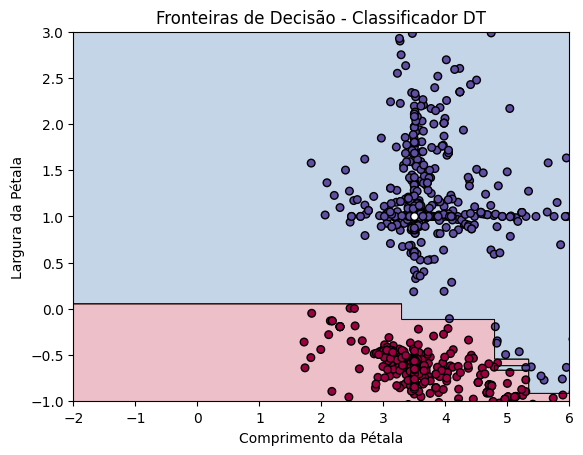

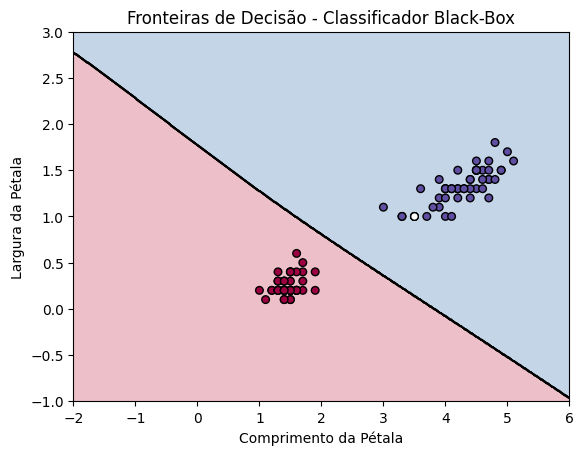

In [63]:
# Definir os limites manualmente
x_min = -2  # Substitua pelo limite desejado para o eixo X
x_max = 6   # Substitua pelo limite desejado para o eixo X
y_min = -1  # Substitua pelo limite desejado para o eixo Y
y_max = 3   # Substitua pelo limite desejado para o eixo Y

# Criar a grade de pontos com os valores fixos
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# Gráfico 1
Z = ClassificadorDT.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.3, cmap="Spectral")
plt.contour(xx, yy, Z, colors='black', linewidths=0.2, linestyles='solid')
plt.scatter(XTOTAL[:, 0], XTOTAL[:, 1], c=ytotal, s=30, cmap="Spectral", edgecolor='k')
plt.scatter(xi[0], xi[1], color='w', s=30, label='Ponto Destacado', edgecolor='black')  # Destacando o ponto
plt.xlabel('Comprimento da Pétala')
plt.ylabel('Largura da Pétala')
plt.title('Fronteiras de Decisão - Classificador DT')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.show()

# Gráfico 2
Z = bb.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.3, cmap="Spectral")
plt.contour(xx, yy, Z, colors='black', linewidths=1, linestyles='solid')
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap="Spectral", edgecolor='k')
plt.scatter(xi[0], xi[1], color='w', s=30, label='Ponto Destacado', edgecolor='black')  # Destacando o ponto
plt.xlabel('Comprimento da Pétala')
plt.ylabel('Largura da Pétala')
plt.title('Fronteiras de Decisão - Classificador Black-Box')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.show()

## RESULTADOS
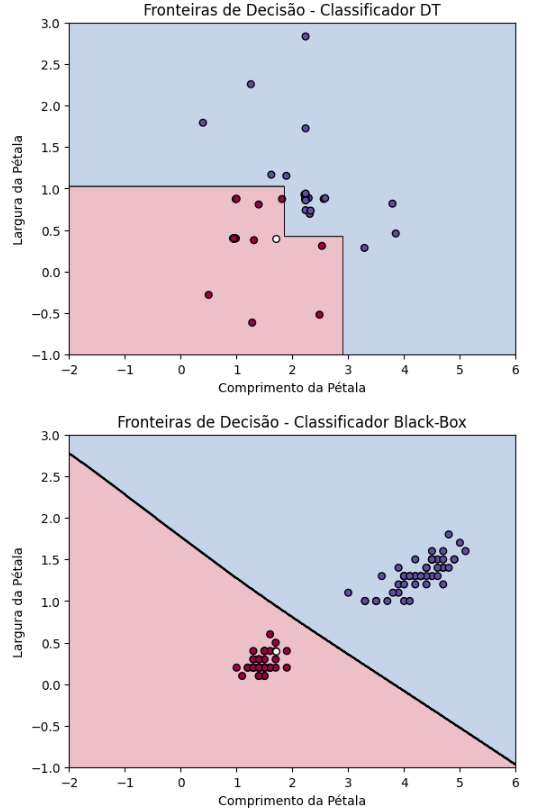  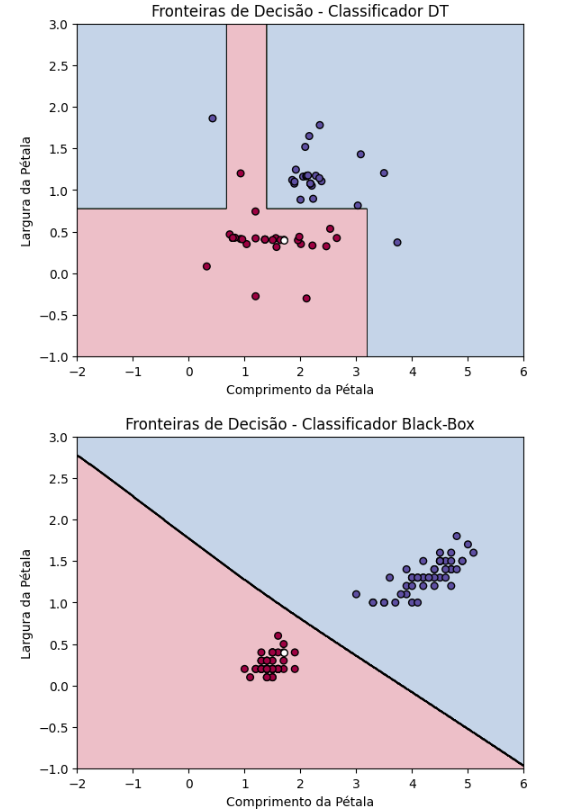

alpha1 = 0.7

alpha2 = 0.5
eta = 0.3

population = toolbox.population(n=30)

ngen = 10 

cxpb, mutpb = 0.5, 0.2

toolbox.register("mate", cxBlendWithClass, alpha=0.5)

toolbox.register("mutate", mutGaussianWithClass, mu=0, sigma=1, indpb=0.2)

toolbox.register("select", tools.selTournament, tournsize=3)

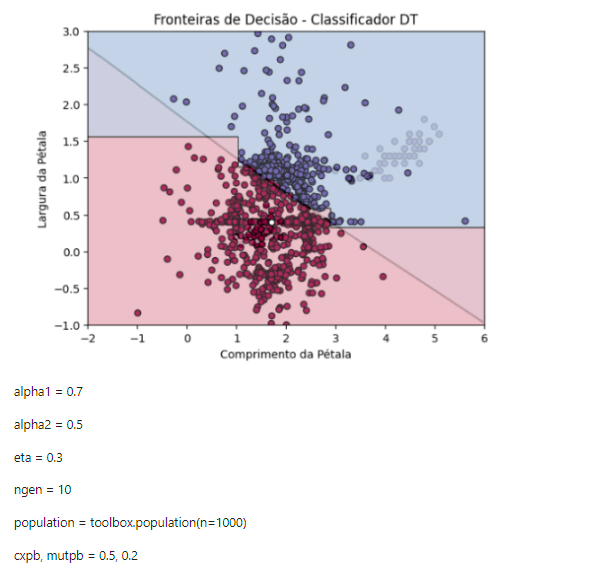

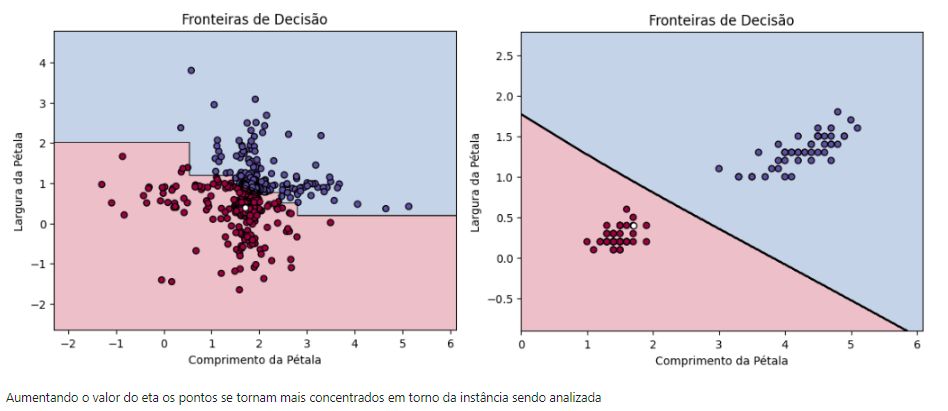

# Melhorou um pouco a geração de pontos azuis 
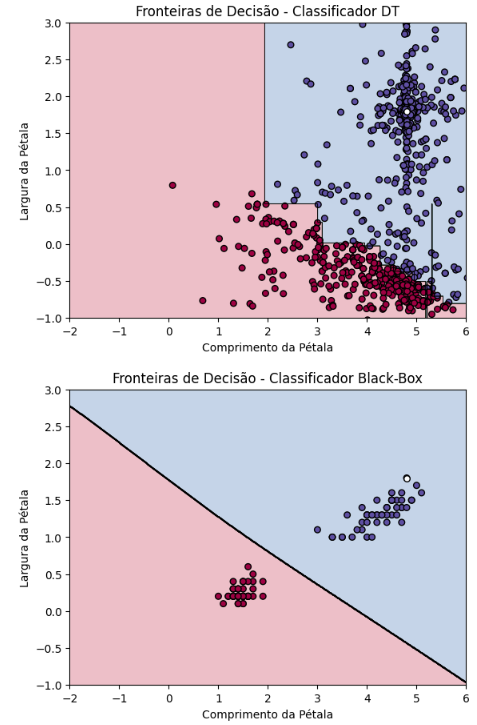 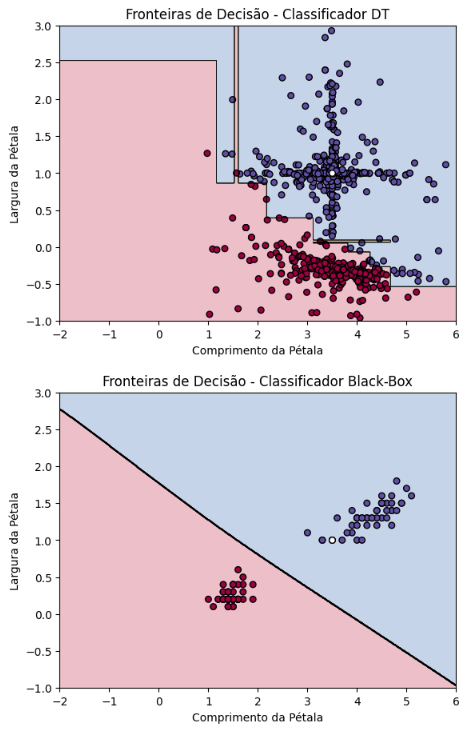